# Report

### Preprocessing 
setting up data to train baseline models of logistic regression and decision trees with all features

In [82]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix


In [2]:
# moving up a directory to access project folder
os.chdir('..')

In [3]:
# grabbing csv from data folder and loading into df
csv_file_path = 'data/raw/tiktok_dataset.csv'
tiktok_dataset = pd.read_csv(csv_file_path)


In [4]:
tiktok_dataset.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


`variable name` | **type** | Description

`claim_status` | **obj**	| Whether the published video has been identified as an “opinion” or a “claim.” In this dataset, an “opinion” refers to an individual’s or group’s personal belief or thought. A “claim” refers to information that is either unsourced or from an unverified source.

`video_id`	| **int**	| Random identifying number assigned to video upon publication on TikTok.

`video_duration_sec`| 	**int**	|  How long the published video is measured in seconds.

`video_transcription_text`	| **obj**	| Transcribed text of the words spoken in the published video.

`verified_status`	| **obj**	| Indicates the status of the TikTok user who published the video in terms of their verification, either “verified” or “not verified.”

`author_ban_status`	| **obj**	| Indicates the status of the TikTok user who published the video in terms of their permissions: “active,” “under scrutiny,” or “banned.”

`video_view_count`	| **float**	| The total number of times the published video has been viewed.

`video_like_count`	| **float** | The total number of times the published video has been liked by other users.

`video_share_count`	| **float** | The total number of times the published video has been shared by other users.

`video_download_count`| 	**float**| The total number of times the published video has been downloaded by other users.

`video_comment_count`		| **float**| The total number of comments on the published video.

In [5]:
tiktok_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [6]:
tiktok_dataset['author_ban_status'].value_counts()

author_ban_status
active          15663
under review     2080
banned           1639
Name: count, dtype: int64

In [7]:
tiktok_dataset.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [8]:
# Drop rows with missing values
tiktok_dataset = tiktok_dataset.dropna(axis=0)

In [9]:
tiktok_dataset.isna().sum()

#                           0
claim_status                0
video_id                    0
video_duration_sec          0
video_transcription_text    0
verified_status             0
author_ban_status           0
video_view_count            0
video_like_count            0
video_share_count           0
video_download_count        0
video_comment_count         0
dtype: int64

In [10]:
# Check for duplicates
tiktok_dataset.duplicated().sum()

0

In [11]:
tiktok_dataset.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19084.000000,1.908400e+04,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9542.500000,5.624840e+09,32.423811,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5509.220604,2.537030e+09,16.226470,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4771.750000,3.425100e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9542.500000,5.609500e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14313.250000,7.840823e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19084.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [12]:
tiktok_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19084 entries, 0 to 19083
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19084 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19084 non-null  int64  
 3   video_duration_sec        19084 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19084 non-null  object 
 6   author_ban_status         19084 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.9+ MB


In [13]:
tiktok_dataset.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [14]:
# binary classification: 'active user' vs 'suspicous user' (under review or banned)
tiktok_dataset['user_status'] = tiktok_dataset['author_ban_status'].apply(
                                                                        lambda x: 'active' 
                                                                        if x == 'active' else 'suspicious')

In [15]:
# sorting features
numeric_features = [
        'video_duration_sec', 
        'video_view_count', 
        'video_like_count', 
        'video_share_count', 
        'video_download_count', 
        'video_comment_count'
]

categorical_features = ['verified_status']

text_features = ['video_transcription_text']


In [16]:
# setup for X and y
X = tiktok_dataset[numeric_features + categorical_features + text_features]
y = LabelEncoder().fit_transform(tiktok_dataset['user_status'])

In [17]:
X.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,verified_status,video_transcription_text
0,59,343296.0,19425.0,241.0,1.0,0.0,not verified,someone shared with me that drone deliveries a...
1,32,140877.0,77355.0,19034.0,1161.0,684.0,not verified,someone shared with me that there are more mic...
2,31,902185.0,97690.0,2858.0,833.0,329.0,not verified,someone shared with me that american industria...
3,25,437506.0,239954.0,34812.0,1234.0,584.0,not verified,someone shared with me that the metro of st. p...
4,19,56167.0,34987.0,4110.0,547.0,152.0,not verified,someone shared with me that the number of busi...


In [18]:
y[:5]

array([1, 0, 0, 0, 0])

In [19]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
X_train.shape

(15267, 8)

In [21]:
X_test.shape

(3817, 8)

In [22]:
# Preprocessing for numeric features
numeric_transformer = StandardScaler()
    
# Preprocessing for categorical features
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Preprocessing for text features
text_transformer = CountVectorizer(
    max_features=100,  # Limit to top 100 features
    stop_words='english',
    lowercase=True
)

In [30]:
# Check shapes of data before transformation
print(X_train[numeric_features].shape)
print(X_train[categorical_features].shape)
print(X_train['video_transcription_text'].shape)

# Apply transformations individually
numeric_data = numeric_transformer.fit_transform(X_train[numeric_features])
categorical_data = categorical_transformer.fit_transform(X_train[categorical_features])
text_data = text_transformer.fit_transform(X_train['video_transcription_text'])

# Check if transformed data has matching row counts
print(numeric_data.shape)
print(categorical_data.shape)
print(text_data.shape)


(15267, 6)
(15267, 1)
(15267,)
(15267, 6)
(15267, 2)
(15267, 100)


In [44]:
text_transformer.vocabulary_

{'learned': 44,
 'media': 47,
 'claim': 15,
 'people': 60,
 'colleagues': 19,
 'feel': 30,
 'used': 90,
 'colleague': 18,
 'article': 4,
 'mentioning': 49,
 'discovered': 23,
 '20': 2,
 'friends': 35,
 'opinion': 59,
 'grow': 36,
 'family': 28,
 'sentiment': 73,
 'size': 75,
 'understanding': 89,
 'say': 72,
 'world': 97,
 'american': 3,
 'radio': 65,
 'largest': 43,
 'brain': 12,
 'online': 58,
 'internet': 41,
 'forum': 33,
 'single': 74,
 'car': 13,
 'million': 51,
 'miles': 50,
 'impression': 40,
 'oldest': 57,
 'view': 92,
 'moon': 53,
 'sleep': 76,
 'longest': 45,
 'recorded': 68,
 'friend': 34,
 'sun': 80,
 'earth': 25,
 'read': 66,
 'news': 55,
 'solar': 78,
 'humans': 38,
 'reasoning': 67,
 'point': 62,
 'social': 77,
 'australia': 5,
 'tv': 87,
 'day': 21,
 'eyes': 27,
 'feet': 32,
 'think': 82,
 'mars': 46,
 'times': 85,
 'reported': 70,
 'expert': 26,
 'feeling': 31,
 'discussion': 24,
 'board': 11,
 'revealed': 71,
 'new': 54,
 'islands': 42,
 'claimed': 16,
 'best': 9,
 '

In [45]:
# Get the vocabulary as a dictionary
vocab = text_transformer.vocabulary_

# Create text column names using the actual words
text_cols = [key for key, value in sorted(vocab.items(), key=lambda x: x[1])]

In [46]:
text_cols

['000',
 '100',
 '20',
 'american',
 'article',
 'australia',
 'average',
 'belief',
 'believe',
 'best',
 'bet',
 'board',
 'brain',
 'car',
 'cats',
 'claim',
 'claimed',
 'claiming',
 'colleague',
 'colleagues',
 'convinced',
 'day',
 'days',
 'discovered',
 'discussion',
 'earth',
 'expert',
 'eyes',
 'family',
 'fastest',
 'feel',
 'feeling',
 'feet',
 'forum',
 'friend',
 'friends',
 'grow',
 'human',
 'humans',
 'hypothesis',
 'impression',
 'internet',
 'islands',
 'largest',
 'learned',
 'longest',
 'mars',
 'media',
 'mentioned',
 'mentioning',
 'miles',
 'million',
 'mobile',
 'moon',
 'new',
 'news',
 'number',
 'oldest',
 'online',
 'opinion',
 'people',
 'planet',
 'point',
 'population',
 'position',
 'radio',
 'read',
 'reasoning',
 'recorded',
 'report',
 'reported',
 'revealed',
 'say',
 'sentiment',
 'single',
 'size',
 'sleep',
 'social',
 'solar',
 'study',
 'sun',
 'taste',
 'think',
 'thinking',
 'time',
 'times',
 'told',
 'tv',
 'understand',
 'understanding',


In [51]:
# transformed df
X_transformed = np.hstack([
    numeric_data, 
    categorical_data.toarray(), 
    text_data.toarray()
])


In [50]:

# Combine column names
numeric_cols = numeric_features
categorical_cols = categorical_transformer.get_feature_names_out(categorical_features)

transformed_columns = list(numeric_cols) + list(categorical_cols) + text_cols

In [52]:

# Create DataFrame
X_train_transformed = pd.DataFrame(X_transformed, columns=transformed_columns)

In [53]:
X_train_transformed.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,verified_status_not verified,verified_status_verified,000,100,...,used,venus,view,wager,water,website,willing,world,year,years
0,0.840634,0.860305,1.383220,1.916528,2.279901,-0.404850,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.025259,-0.774693,-0.622519,-0.508266,-0.508593,-0.430014,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.332967,0.747300,-0.501922,-0.340870,-0.373979,-0.427497,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.332967,2.187249,-0.578011,-0.450047,-0.466214,-0.369621,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.963717,-0.763122,-0.617837,-0.521944,-0.523051,-0.440079,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
numeric_test_data = numeric_transformer.transform(X_test[numeric_features])
categorical_test_data = categorical_transformer.transform(X_test[categorical_features])
text_test_data = text_transformer.transform(X_test['video_transcription_text'])

In [72]:
X_test_transformed = np.hstack([
    numeric_test_data, 
    categorical_test_data.toarray(), 
    text_test_data.toarray()
])


In [73]:
X_test_transformed = pd.DataFrame(X_test_transformed, columns=transformed_columns)

### Training Baseline
Using all features to make baseline model to measure performance

In [85]:
# Logistic Regression
lr_model = LogisticRegression(
    random_state=42, 
    max_iter=1000
)
lr_model.fit(X_train_transformed, y_train)
lr_predictions = lr_model.predict(X_test_transformed)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_predictions))
print("Logistic Regression Classification Report:\n", 
    classification_report(y_test, lr_predictions))


Logistic Regression Accuracy: 0.8056064972491486
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.89      3074
           1       1.00      0.00      0.00       743

    accuracy                           0.81      3817
   macro avg       0.90      0.50      0.45      3817
weighted avg       0.84      0.81      0.72      3817



In [86]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_transformed, y_train)
dt_predictions = dt_model.predict(X_test_transformed)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_predictions))
print("Decision Tree Classification Report:\n", 
    classification_report(y_test, dt_predictions))

Decision Tree Accuracy: 0.7212470526591565
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      3074
           1       0.29      0.29      0.29       743

    accuracy                           0.72      3817
   macro avg       0.56      0.56      0.56      3817
weighted avg       0.72      0.72      0.72      3817



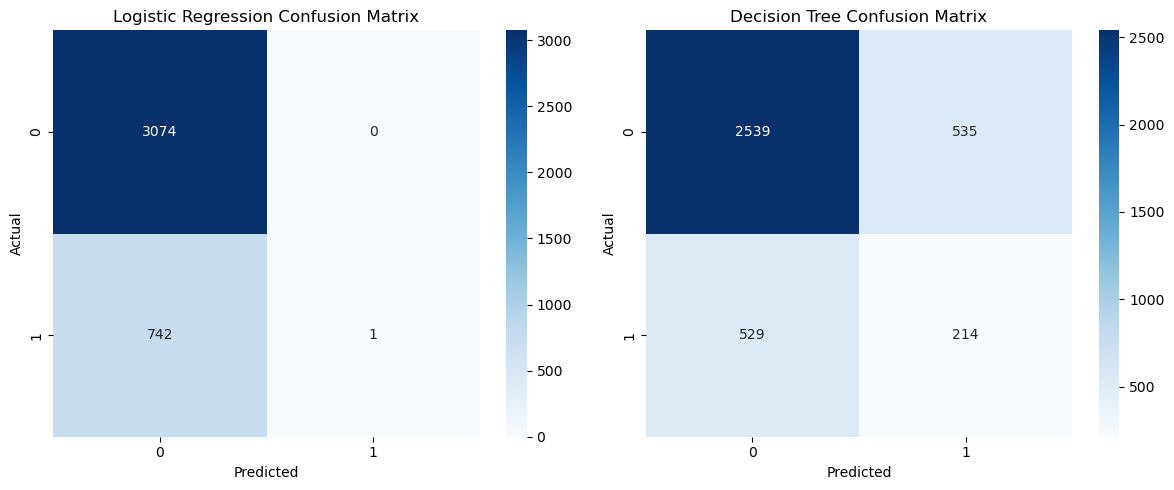

In [87]:

# Create confusion matrix
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test, lr_predictions)
cm_dt = confusion_matrix(y_test, dt_predictions)

# Plot heatmaps
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()